# EX05

##### You have to write a program that randomly splits the file Train_knight.csv into Training_knight.csv and Validation_knight.csv; You must be able to explain how many % you keep in each file and why

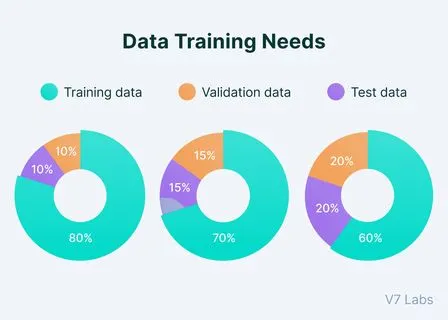

> Robust model === consistent results, correct most of the time


> Achived by Training, Validation and Testing

Usual approach uses:
1. 70% of data for Training
2. 20% for Testing
3. 10% for Validation

Model is *optimized* based on the **version** of teh world, represented by the _training data_  (1)

It's being optimized against the expected results (predictions), and being tuned for the **best performance possible** on the _validation data_.  (2)


Once this is done, we confirm the model behavior on the **Test data** (3)

Goal: we created generalized model, which is able to represent data from the real world ✅

# SPLITTING THE DATA

##### Once we have the data, we decide how to split. In some cases, we **can't** split data randomly, such as in case of the temperature at specific hour. In those cases, we split _sequentially_.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [ ]:
df_train = pd.read_csv('../Train_knight.csv')
df_test = pd.read_csv('../Test_knight.csv')

In [40]:
# df_test.shape
# df_train.shape
# df_test.head()

#### ASSESSMENT

1 - Test_knight.csv - 171 records

2 - Train_knight.csv - 398 records

---
Total 569 records
---

10% - 57records

20% - 113records

70% - 379records


---

Distro:

Test optimal - 113 records |
**Test actual - 171 records   (missing 'knight' indicator)**


Train optimal - 379 records | 
**Train actual - 339 records** 


**Validation actual - 59 records** (cca 15% of the train dataset)


###### These:  Test WHAT HAPPENNS when I use 171 records for validation as well --- this would leave me also only 227 records in the training set...

In [ ]:
# Create random indices for shuffling
random_state = np.random.permutation(len(df_train))
df_train_shuffled = df_train.iloc[random_state].reset_index(drop=True)

In [41]:
# Calculate split point (15% for validation, 85% for training)
split_point = int(len(df_train_shuffled) * 0.150)

# Split the data
df_validation = df_train_shuffled.iloc[:split_point].copy()
df_training = df_train_shuffled.iloc[split_point:].copy()

In [42]:
df_validation.shape, df_training.shape

((59, 31), (339, 31))

In [43]:
df_validation.to_csv('../Validation_knight.csv', index=False)
df_training.to_csv('../Training_knight.csv', index=False)